# Setup

In [28]:
import numpy as np

with open('input.txt') as f:
    lines = f.readlines()

points = np.array([[int(c) for c in line.strip().split(',')] for line in lines], dtype=np.int64)

# Solve Part 1

In [29]:
num_points = points.shape[0]
r1, r2 = np.triu_indices(num_points, k=1)
pairs = np.column_stack((r1, r2))

diff = np.abs(points[r1] - points[r2]) + 1
areas = np.prod(diff, axis=1)

sorted_indices = np.argsort(areas)
print("Part 1:", areas[sorted_indices[-1]])

Part 1: 4746238001


### Helper function to display any given rectangle in the polygon

C:\Users\cedri\AppData\Local\Temp\ipykernel_23272\687340186.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


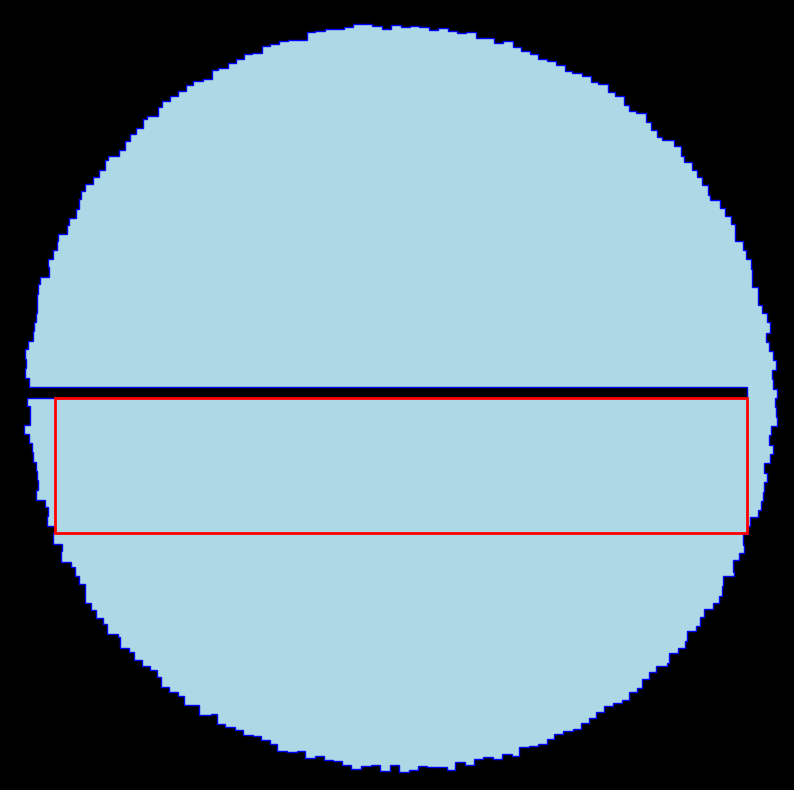

In [30]:
import matplotlib.pyplot as plt

def export_frame(a, b, show_instead=False, counter=0):
    fig, ax = plt.subplots(1,1, figsize=(10,10))

    ax.set_ylim(0, max(points[:,1]) + 1000)
    ax.set_xlim(0, max(points[:,0]) + 1000)
    ax.set_axis_off()
    ax.set_facecolor((0,0,0))
    fig.patch.set_facecolor((0,0,0))

    polygon = plt.Polygon(points, closed=True, fill=True, edgecolor='b', facecolor='lightblue')
    ax.add_patch(polygon)
    rect = plt.Rectangle((min(a[0], b[0]), min(a[1], b[1])), abs(a[0]-b[0]), abs(a[1]-b[1]), linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.invert_yaxis()
    if show_instead:
        fig.show()
    else:
        fig.savefig(f'tile_frames/frame_{counter:05}.png', dpi=300, bbox_inches='tight', pad_inches=0)
        plt.close(fig=fig)
export_frame([ 5755, 67570],  [94539, 50089], show_instead=True)

# Solve part 2
On my computer and input this takes ~70 seconds

In [ ]:
def is_point_inside_polygon(point: tuple[int, int]) -> bool:
    """ Check if a point is inside a polygon using the ray-casting algorithm. Points on the edge are considered inside. It follows this algorithm: https://www.eecs.umich.edu/courses/eecs380/HANDOUTS/PROJ2/InsidePoly.html"""
    y, x = point
    inside = False
    for point_a, point_b in zip(points, np.roll(points, -1, axis=0)):
        ay, ax = point_a
        by, bx = point_b
        
        # Check if point sits on chord, if so, consider it inside
        for (py, px) in (point_a, point_b):
            if (y == py) and min(ax, bx) <= x <= max(ax, bx):
                return True
            if (x == px) and min(ay, by) <= y <= max(ay, by):
                return True
        
        if ((ay > y) != (by > y)) and (x < (bx - ax) * (y - ay) / (by - ay) + bx):
            inside = not inside
    return inside

def do_lines_intersect(p1: np.ndarray, p2: np.ndarray, q1: np.ndarray, q2: np.ndarray) -> bool:
    """ Check if two line segments (p1, p2) and (q1, q2) intersect, following this algorithm: https://stackoverflow.com/questions/563198/how-do-you-detect-where-two-line-segments-intersect"""
    
    def cross_2d(v, w):
        return v[0] * w[1] - v[1] * w[0]

    r = p2 - p1
    s = q2 - q1
    
    denominator = cross_2d(r, s)
    uNumerator = cross_2d((q1 - p1), r)
    
    if denominator == 0:
        if uNumerator == 0:
            # collinear is fine
            return False
        else:
            # parallel and non-intersecting
            return False
    else:
        t = cross_2d((q1 - p1), s) / denominator
        u = uNumerator / denominator
        if (0 <= t <= 1) and (0 <= u <= 1):
            intersect_point = p1 + t * r
            if np.allclose(intersect_point, p1) or np.allclose(intersect_point, p2) or np.allclose(intersect_point, q1) or np.allclose(intersect_point, q2):
                return False
            return True
    return False


# generate_gif = True
# start_gif_at_frame = 0
a, b = None, None
for i, pair_idx in enumerate(reversed(sorted_indices)):
    # if i < start_gif_at_frame:
    #     continue  
    if i % 1000 == 0:
        percent = i / len(sorted_indices)
        print(f"Checking pair {i} / {len(sorted_indices)} ({percent:.2%})", end='\r')
    a, b = points[pairs[pair_idx][0]], points[pairs[pair_idx][1]]
    
    one_corner = (a[0], b[1])
    other_corner = (b[0], a[1])
    corners = np.array([a, one_corner, b, other_corner])
      
    # if generate_gif:
    #     export_frame(a, b, counter=i)
    
    # Check if any chord intersects with polygon edges
    for p1, p2 in zip(corners, np.roll(corners, -1, axis=0)):
        point_pairs = zip(points, np.roll(points, -1, axis=0))
        if not any(do_lines_intersect(p1, p2, q1, q2) for q1, q2 in point_pairs):
            # No intersection for this chord
            continue
        # At least one chord intersects
        break
    else:
        # If no chord intersect, check if corners are inside polygon
        if not is_point_inside_polygon(one_corner) or not is_point_inside_polygon(other_corner):
            continue
       
        print(f"Part 2: {areas[pair_idx]} with points {a} and {b}")
        break   
    
### Here we can generate an output gif
# if generate_gif:
#     import imageio.v2 as imageio
#     import os

#     with imageio.get_writer('day9_part2.gif', mode='I', duration=0.4) as writer:
#         for file in os.listdir('tile_frames'):
#             if file.endswith('.png'):
#                 image = imageio.imread(os.path.join('tile_frames', file))
#                 writer.append_data(image)

export_frame(a, b, show_instead=True)

KeyboardInterrupt: 

### GTP-5.1 got to optimize my code a bit
It's my logic, but vectorized as hell. I don't know how a human would write this code, but i guess that's what llms are for?

Part 2 (optimized by GPT-5.1-Codex): 1552139370 with points [ 5755 67570] and [94539 50089]


C:\Users\cedri\AppData\Local\Temp\ipykernel_23272\687340186.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


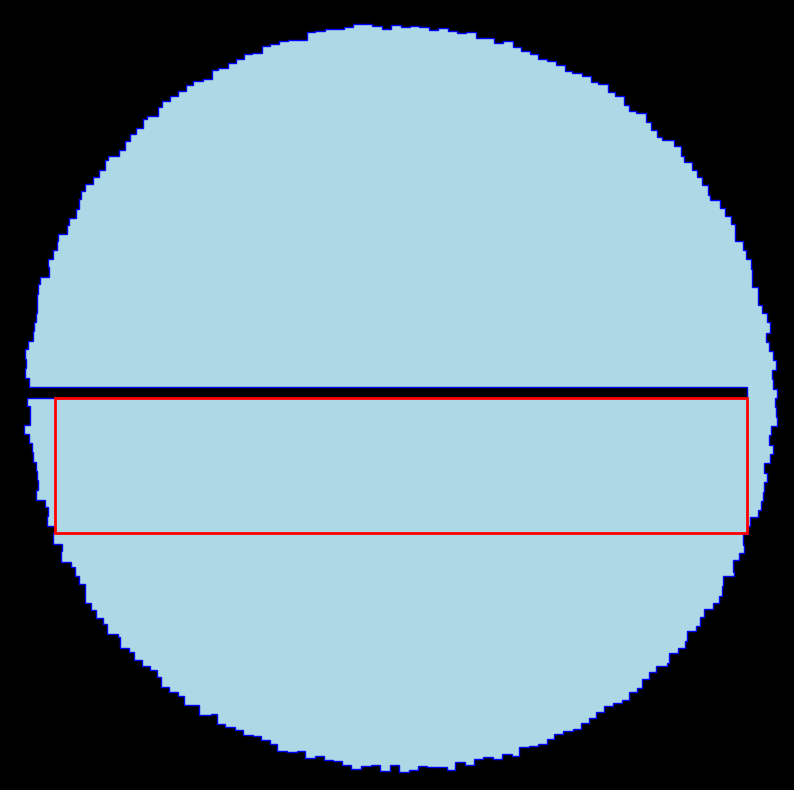

In [33]:
"""Optimized Part 2 solver that vectorizes polygon tests and caches repeated checks."""
from functools import cache

points_float_opt = points.astype(np.float64)
edge_start = points_float_opt
edge_end = np.roll(points_float_opt, -1, axis=0)
edge_vec = edge_end - edge_start
edge_len_sq = np.sum(edge_vec ** 2, axis=1)

def cross_2d(v, w):
    return v[..., 0] * w[..., 1] - v[..., 1] * w[..., 0]

def point_on_edge(point):
    rel = point - edge_start
    collinear = np.isclose(cross_2d(edge_vec, rel), 0.0)
    dot = np.sum(rel * edge_vec, axis=1)
    within = (dot >= 0.0) & (dot <= edge_len_sq)
    return bool(np.any(collinear & within))

def _is_inside_polygon(point_array):
    p = np.asarray(point_array, dtype=np.float64)
    if point_on_edge(p):
        return True
    y, x = p
    ys = edge_start[:, 0]
    xs = edge_start[:, 1]
    ye = edge_end[:, 0]
    xe = edge_end[:, 1]
    with np.errstate(divide='ignore', invalid='ignore'):
        ray_hits = ((ys > y) != (ye > y)) & (x < (xe - xs) * (y - ys) / (ye - ys) + xs)
    return bool(np.count_nonzero(ray_hits) % 2)

@cache
def is_inside_polygon(point_tuple):
    return _is_inside_polygon(np.array(point_tuple, dtype=np.float64))

def chord_intersects_polygon(p1, p2):
    p1 = np.asarray(p1, dtype=np.float64)
    p2 = np.asarray(p2, dtype=np.float64)
    r = p2 - p1
    qp = edge_start - p1
    denom = cross_2d(r, edge_vec)
    parallel = np.isclose(denom, 0.0)
    u_num = cross_2d(qp, r)
    t_num = cross_2d(qp, edge_vec)
    t = np.zeros_like(denom)
    u = np.zeros_like(denom)
    with np.errstate(divide='ignore', invalid='ignore'):
        np.divide(t_num, denom, out=t, where=~parallel)
        np.divide(u_num, denom, out=u, where=~parallel)
    intersects = (~parallel) & (t >= 0.0) & (t <= 1.0) & (u >= 0.0) & (u <= 1.0)
    if not np.any(intersects):
        return False
    t_sel = t[intersects]
    intersection_points = p1 + t_sel[:, None] * r
    edge_start_sel = edge_start[intersects]
    edge_end_sel = edge_end[intersects]
    close_to_p1 = np.all(np.isclose(intersection_points, p1, atol=1e-9), axis=1)
    close_to_p2 = np.all(np.isclose(intersection_points, p2, atol=1e-9), axis=1)
    close_to_edge_start = np.all(np.isclose(intersection_points, edge_start_sel, atol=1e-9), axis=1)
    close_to_edge_end = np.all(np.isclose(intersection_points, edge_end_sel, atol=1e-9), axis=1)
    touching_only = close_to_p1 | close_to_p2 | close_to_edge_start | close_to_edge_end
    return bool(np.any(~touching_only))

def rectangle_is_valid(corners):
    for p1, p2 in zip(corners, np.roll(corners, -1, axis=0)):
        if chord_intersects_polygon(p1, p2):
            return False
    return True


best_a_opt, best_b_opt = None, None
for i, pair_idx in enumerate(sorted_indices[::-1]):
    first_idx, second_idx = pairs[pair_idx]
    a_opt, b_opt = points[first_idx], points[second_idx]
    one_corner = (int(a_opt[0]), int(b_opt[1]))
    other_corner = (int(b_opt[0]), int(a_opt[1]))
    if not (is_inside_polygon(one_corner) and is_inside_polygon(other_corner)):
        continue
    corners = np.array([a_opt, one_corner, b_opt, other_corner], dtype=np.float64)
    if rectangle_is_valid(corners):
        best_a_opt, best_b_opt = a_opt, b_opt
        print(f"Part 2 (optimized by GPT-5.1-Codex): {areas[pair_idx]} with points {best_a_opt} and {best_b_opt}")
        break
export_frame(best_a_opt, best_b_opt, show_instead=True)